# Arima model

In [1]:
# pip install pmdarima

In [2]:
import pandas as pd 
import numpy as np 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA 
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/aishwaryamate/Datasets/main/DailyTemp.csv", index_col=0, parse_dates=True)
df

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758
...,...,...,...,...,...
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1821 entries, 2014-01-01 to 2018-12-30
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MinTemp  1821 non-null   float64
 1   MaxTemp  1821 non-null   float64
 2   AvgTemp  1821 non-null   float64
 3   Sunrise  1821 non-null   int64  
 4   Sunset   1821 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 85.4 KB


In [5]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

# check stationarity of the data

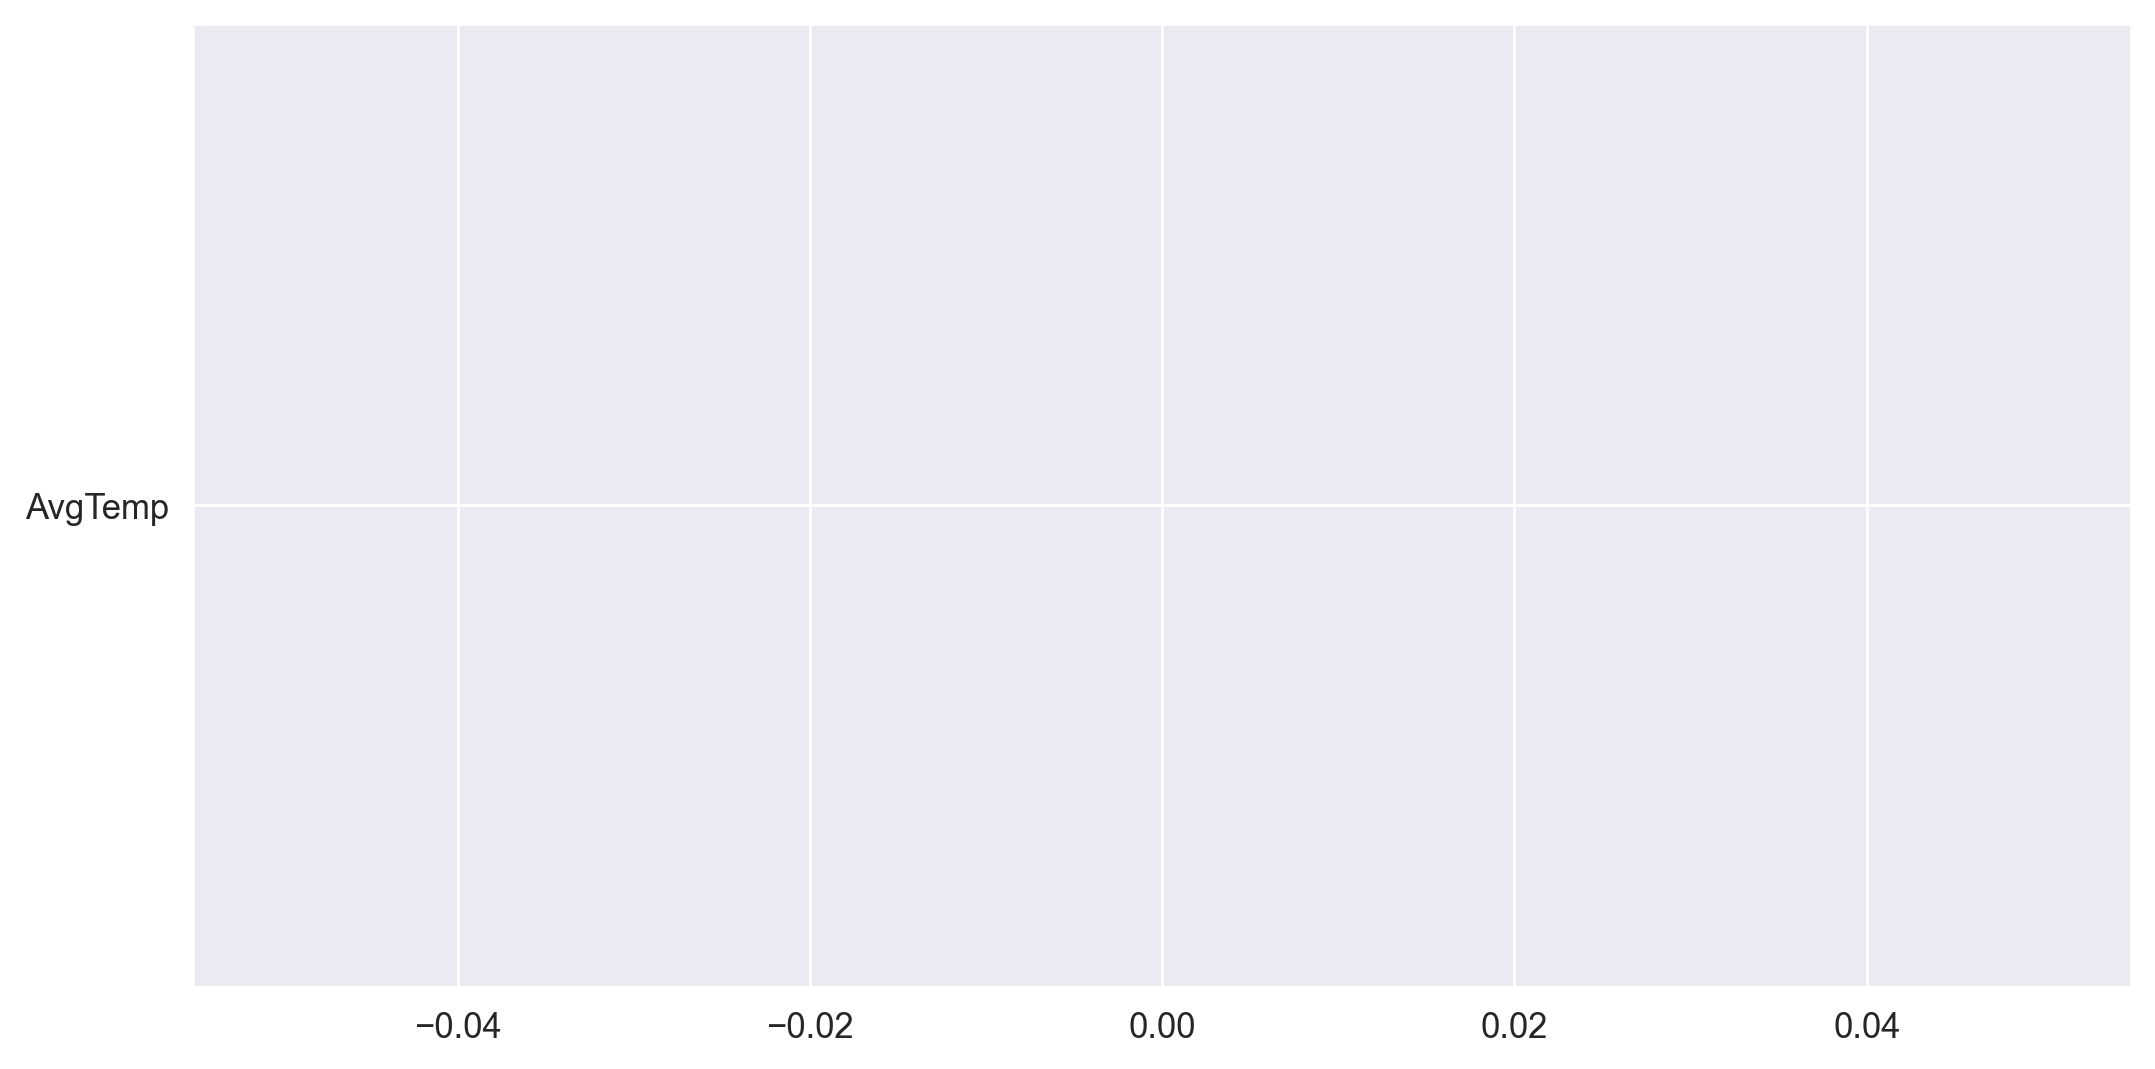

In [6]:
plt.plot(['AvgTemp'])

In [7]:
adfuller(df['AvgTemp'])

(-6.554680125068776,
 8.67593748019975e-09,
 12,
 1808,
 {'1%': -3.433972018026501,
  '5%': -2.8631399192826676,
  '10%': -2.5676217442756872},
 8146.207832960945)

# Arima model building.

In [8]:
#find out order of arima

In [31]:
order = auto_arima(df['AvgTemp'])

In [10]:
order

ARIMA(order=(1, 0, 5), scoring_args={}, suppress_warnings=True)

In [11]:
df.shape

(1821, 5)

In [12]:
# split the data

In [13]:
train = df.iloc[:-30]
test = df.iloc[-30]

In [14]:
train.shape

(1791, 5)

In [28]:
# Arima model
model = ARIMA(train['AvgTemp'], order=(1, 0, 5)).fit()

# Evaluating the model

In [27]:
test

MinTemp      36.0
MaxTemp      52.0
AvgTemp      44.0
Sunrise     640.0
Sunset     1743.0
Name: 2018-12-01 00:00:00, dtype: float64

In [29]:
ypred = model.predict(start=1791, end=1821)
ypred

1791    44.754109
1792    44.987795
1793    45.388741
1794    45.721546
1795    45.863733
1796    45.874126
1797    45.884370
1798    45.894466
1799    45.904417
1800    45.914225
1801    45.923891
1802    45.933419
1803    45.942809
1804    45.952064
1805    45.961185
1806    45.970176
1807    45.979037
1808    45.987770
1809    45.996377
1810    46.004861
1811    46.013222
1812    46.021464
1813    46.029586
1814    46.037591
1815    46.045482
1816    46.053258
1817    46.060923
1818    46.068477
1819    46.075923
1820    46.083261
1821    46.090494
Name: predicted_mean, dtype: float64